In [1]:
!git clone https://github.com/SE-ABOSALIM/Brain-Tumor-Detection.git

Cloning into 'Brain-Tumor-Detection'...
Updating files:  14% (2006/14056)
Updating files:  15% (2109/14056)
Updating files:  16% (2249/14056)
Updating files:  17% (2390/14056)
Updating files:  18% (2531/14056)
Updating files:  19% (2671/14056)
Updating files:  20% (2812/14056)
Updating files:  21% (2952/14056)
Updating files:  22% (3093/14056)
Updating files:  23% (3233/14056)
Updating files:  24% (3374/14056)
Updating files:  25% (3514/14056)
Updating files:  26% (3655/14056)
Updating files:  26% (3759/14056)
Updating files:  27% (3796/14056)
Updating files:  28% (3936/14056)
Updating files:  29% (4077/14056)
Updating files:  30% (4217/14056)
Updating files:  31% (4358/14056)
Updating files:  32% (4498/14056)
Updating files:  33% (4639/14056)
Updating files:  34% (4780/14056)
Updating files:  35% (4920/14056)
Updating files:  36% (5061/14056)
Updating files:  37% (5201/14056)
Updating files:  38% (5342/14056)
Updating files:  39% (5482/14056)
Updating files:  39% (5590/14056)
Updating

In [4]:
!dir Brain-Tumor-Detection

 Volume in drive C has no label.
 Volume Serial Number is 7E02-C4AF

 Directory of c:\Users\90538\Desktop\For Testing\Brain-Tumor-Detection

03/26/2025  01:28 PM    <DIR>          .
03/26/2025  01:28 PM    <DIR>          ..
03/26/2025  01:28 PM    <DIR>          .idea
03/26/2025  01:28 PM    <DIR>          cleaned-Dataset
03/26/2025  01:28 PM    <DIR>          Dataset
03/26/2025  01:28 PM             6,248 Main.py
03/26/2025  01:28 PM             7,327 Main2.py
03/26/2025  01:28 PM             4,889 Main3.py
03/26/2025  01:28 PM             3,174 Main4.py
03/26/2025  01:28 PM                23 README.md
03/26/2025  01:28 PM             8,820 tensorflow.yaml
               6 File(s)         30,481 bytes
               5 Dir(s)  77,681,250,304 bytes free


In [11]:
!dir /S "Brain-Tumor-Detection\cleaned-Dataset"

 Volume in drive C has no label.
 Volume Serial Number is 7E02-C4AF

 Directory of c:\Users\90538\Desktop\For Testing\Brain-Tumor-Detection\cleaned-Dataset

03/26/2025  01:28 PM    <DIR>          .
03/26/2025  01:28 PM    <DIR>          ..
03/26/2025  01:28 PM    <DIR>          Testing
03/26/2025  01:28 PM    <DIR>          Training
               0 File(s)              0 bytes

 Directory of c:\Users\90538\Desktop\For Testing\Brain-Tumor-Detection\cleaned-Dataset\Testing

03/26/2025  01:28 PM    <DIR>          .
03/26/2025  01:28 PM    <DIR>          ..
03/26/2025  01:28 PM    <DIR>          glioma
03/26/2025  01:28 PM    <DIR>          meningioma
03/26/2025  01:28 PM    <DIR>          notumor
03/26/2025  01:28 PM    <DIR>          pituitary
               0 File(s)              0 bytes

 Directory of c:\Users\90538\Desktop\For Testing\Brain-Tumor-Detection\cleaned-Dataset\Testing\glioma

03/26/2025  01:28 PM    <DIR>          .
03/26/2025  01:28 PM    <DIR>          ..
03/26/2025  01

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm
import itertools
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [13]:
np.random.seed(0)

In [14]:
# إعداد المسارات
dataset_path = "Brain-Tumor-Detection/Dataset"
train_path = os.path.join(dataset_path, "Training")
test_path = os.path.join(dataset_path, "Testing")
labels = ['glioma', 'meningioma', 'notumor', 'pituitary']
image_size = 150

In [15]:
# Helper function to load and process images
def process_image(img_path):
    img = cv2.imread(img_path, 0)
    img = cv2.bilateralFilter(img, 2, 50, 50)
    img = cv2.applyColorMap(img, cv2.COLORMAP_BONE)
    img = cv2.resize(img, (image_size, image_size))
    return img

In [16]:
# تحميل الصور وتصنيفها
x_train, y_train, x_test, y_test = [], [], [], []

In [17]:
# تعريف حجم الصورة
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)  # تقسيم البيانات إلى تدريب واختبار داخلي
test_datagen = ImageDataGenerator(rescale=1./255)


In [18]:
for label in labels:
    category_index = labels.index(label)

    # تدريب
    train_folder = os.path.join(train_path, label)
    for file in tqdm(os.listdir(train_folder), desc=f"Training - {label}"):
        img = cv2.imread(os.path.join(train_folder, file), 0)
        img = cv2.bilateralFilter(img, 2, 50, 50)
        img = cv2.applyColorMap(img, cv2.COLORMAP_BONE)
        img = cv2.resize(img, (image_size, image_size))
        x_train.append(img)
        y_train.append(category_index)


    test_folder = os.path.join(test_path, label)
    for file in tqdm(os.listdir(test_folder), desc=f"Testing - {label}"):
        img = cv2.imread(os.path.join(test_folder, file), 0)
        img = cv2.bilateralFilter(img, 2, 50, 50)
        img = cv2.applyColorMap(img, cv2.COLORMAP_BONE)
        img = cv2.resize(img, (image_size, image_size))
        x_test.append(img)
        y_test.append(category_index)

Testing - pituitary: 100%|██████████| 300/300 [00:04<00:00, 72.18it/s]


In [19]:
# تحويل الصور إلى numpy arrays وتطبيعها
x_train = np.array(x_train) / 255.0
x_test = np.array(x_test) / 255.0

In [20]:
# Veri setini eğitim, test ve doğrulama setlerine ayırma
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.1, random_state=42)
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.1, random_state=42)

In [21]:
# تحويل التصنيفات إلى one-hot
y_train = to_categorical(y_train, num_classes=4)
y_test = to_categorical(y_test, num_classes=4)

In [22]:
# إعداد مولد البيانات لتحميل الصور وتصنيفها تلقائيًا
img_size = (150, 150)
batch_size = 32

# تدريب و اختبار
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # تحديد 20% من البيانات لتكون للتحقق
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'  # تحديد جزء التدريب
)

validation_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'  # تحديد جزء التحقق
)

# توليد بيانات الاختبار باستخدام ImageDataGenerator
test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

Found 4571 images belonging to 4 classes.
Found 1141 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


In [24]:
print(x_train.shape)
print(x_test.shape)

(4626, 150, 150, 3)
(572, 150, 150, 3)


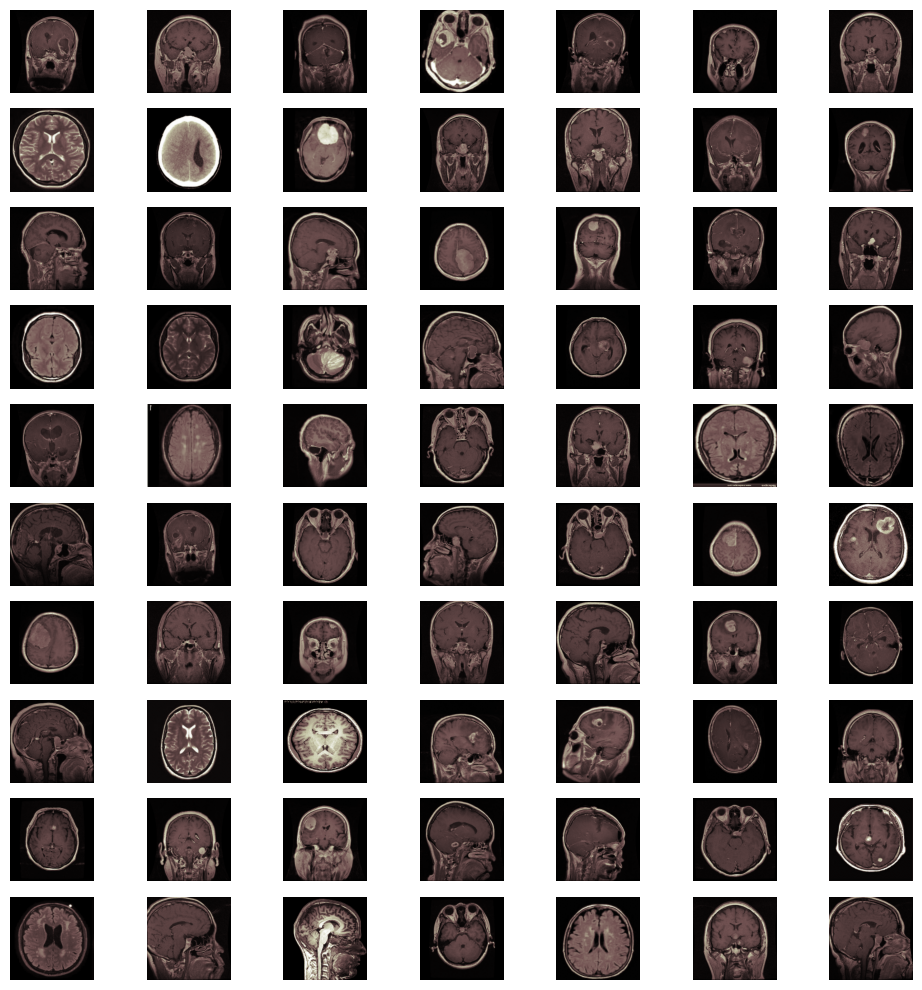

In [25]:
# عرض بعض الصور للتأكيد
fig, axes = plt.subplots(10, 7, figsize=(10, 10))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(x_train[i])
    ax.axis('off')
plt.tight_layout()
plt.show()

In [26]:
# إنشاء نموذج CNN
def create_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), input_shape=(image_size, image_size, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.15))

    model.add(Conv2D(32, kernel_size=(5, 5), activation='relu', padding='same'))
    model.add(MaxPooling2D())
    model.add(Dropout(0.15))

    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D())
    model.add(Dropout(0.15))

    model.add(Conv2D(64, kernel_size=(2, 2), activation='relu', padding='same'))
    model.add(MaxPooling2D())
    model.add(Dropout(0.15))

    model.add(Flatten())

    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.45))

    model.add(Dense(4, activation='softmax'))

    model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [27]:
# إنشاء النموذج
model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 74, 74, 32)        25632     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 32)        9

In [28]:
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.05,
    height_shift_range=0.05,
    horizontal_flip=True
)
datagen.fit(x_train)

In [29]:
history = model.fit(
    datagen.flow(x_train, y_train, batch_size=64),
    validation_data=validation_generator,  # استخدم validation_generator هنا
    epochs=45,
    steps_per_epoch=len(x_train) // 32
)

Epoch 1/45
 73/144 [==============>...............] - 20s 273ms/step - loss: 1.3854 - accuracy: 0.2821 - val_loss: 1.3849 - val_accuracy: 0.2796


In [30]:
# تقييم النموذج
score = model.evaluate(x_test, y_test, verbose=0)
print("✅ Test Loss:", score[0])
print("✅ Test Accuracy:", score[1])

✅ Test Loss: 1.3860013484954834
✅ Test Accuracy: 0.26923078298568726


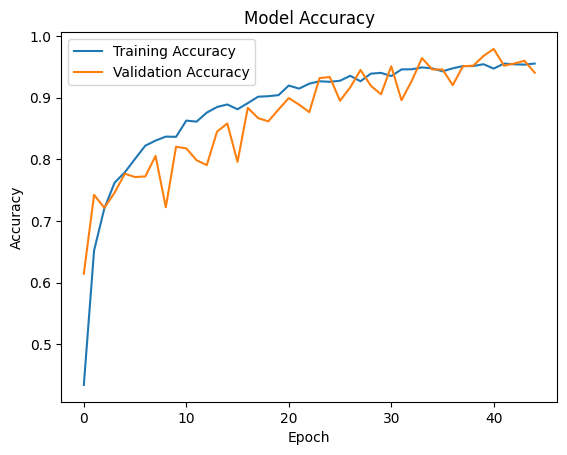

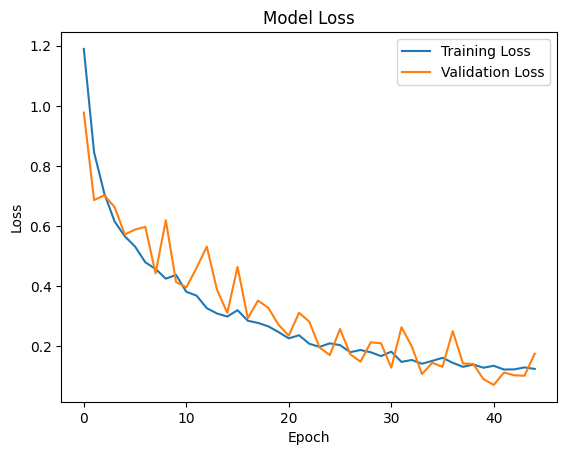

In [ ]:
# رسم الأداء
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# اختيار صورة عشوائية من مجموعة الاختبار
random_index = np.random.randint(0, len(x_test))
random_img = x_test[random_index]

# تأكد من أن الصورة بحجم 150x150 بكسل
random_img_resized = cv2.resize(random_img, (150, 150))

# تطبيع الصورة
random_img_resized = random_img_resized / 255.0

In [ ]:
# إجراء التنبؤ
predictions = model.predict(random_img_resized.reshape(1, 150, 150, 3))
predicted_class = np.argmax(predictions)
predicted_label = labels[predicted_class]
confidence = predictions[0][predicted_class]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 529ms/step


Predicted label: pituitary 
Actual label: meningioma 
Confidence: 74.61%



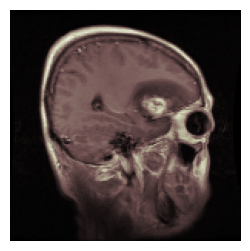

In [ ]:
# الحصول على التسمية الفعلية
actual_index = y_test[random_index]
actual_class = np.argmax(actual_index)
actual_label = labels[actual_class]

# طباعة النتائج
print(f"Predicted label: {predicted_label} \nActual label: {actual_label} \nConfidence: {confidence*100:.2f}%\n")
plt.figure(figsize=(3, 3))
plt.imshow(random_img)
plt.axis('off')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Predicted label: pituitary 
Actual label: notumor 
Confidence: 75.71%



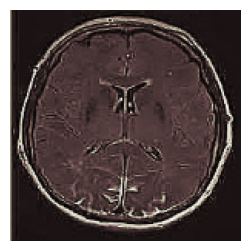

In [ ]:
# عند استخدام التنبؤ:
random_index = np.random.randint(0, len(x_test))  # اختيار صورة عشوائية
random_img = x_test[random_index]  # الصورة عشوائيًا من مجموعة الاختبار

# تأكد من أن الصورة بحجم 150x150 بكسل وتطبيعها:
random_img_resized = cv2.resize(random_img, (150, 150))
random_img_resized = random_img_resized / 255.0

# التنبؤ:
predictions = model.predict(random_img_resized.reshape(1, 150, 150, 3))
predicted_class = np.argmax(predictions)
predicted_label = labels[predicted_class]
confidence = predictions[0][predicted_class]

# الحصول على التصنيف الفعلي من y_test (التصنيف الفعلي هو الذي تم تطبيقه عليها One-Hot)
actual_index = np.argmax(y_test[random_index])  # استخراج التصنيف الفعلي
actual_label = labels[actual_index]  # اسم الفئة الفعلية

# عرض النتائج:
print(f"Predicted label: {predicted_label} \nActual label: {actual_label} \nConfidence: {confidence*100:.2f}%\n")
plt.figure(figsize=(3, 3))
plt.imshow(random_img)
plt.axis('off')
plt.show()

In [ ]:
score = model.evaluate(test_generator, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.2807820737361908
Test accuracy: 0.9077040553092957


In [ ]:
score = model.evaluate(x_test, y_test)
print("Test Loss:", score[0])
print("Test Accuracy:", score[1])

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9590 - loss: 0.1759
Test Loss: 0.15767472982406616
Test Accuracy: 0.9510489702224731


In [ ]:
model.save("cnn_brain_tumor_model.h5")
print("✅ Model saved as cnn_brain_tumor_model.h5")

✅ Model saved as cnn_brain_tumor_model.h5
